# **Milestone 2**

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

**Note:** Please load the data frame that was saved in Milestone 1 here before separating the data, and then proceed to the next step in Milestone 2.

In [1]:
# Import required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics



### **Load the data**

In [2]:
cars_data = pd.read_csv("cars_data_updated.csv")

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [3]:
# Step-1
X = cars_data.drop(['Name','Price','price_log','Kilometers_Driven'], axis = 1)

y = cars_data[["price_log", "Price"]]

In [4]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)
X.head()

,Year,Mileage,Engine,Power,Seats,New_price,kilometers_driven_log,power_log,Location_Bangalore,Location_Chennai,...,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zen,Model_Zest,Model_i10,Model_i20,Model_redi-GO
0,2010,26.60,998,58.16,5,11.57,11.184421,4.063198,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,19.67,1582,126.20,5,11.57,10.621327,4.837868,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,18.20,1199,88.70,5,8.61,10.736397,4.485260,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2012,20.77,1248,88.76,7,11.57,11.373663,4.485936,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2013,15.20,1968,140.80,5,11.57,10.613246,4.947340,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(5076, 276) (2176, 276)


In [6]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_cleaned_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [7]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [8]:
y_train['price_log'].fillna(y_train.price_log.mean(), inplace = True)

X_cleaned_train = np.nan_to_num(X_train)
y_train['Price'] = np.nan_to_num(y_train['Price'])
y_train['price_log'] = np.nan_to_num(y_train['price_log'])
X_test = np.nan_to_num(X_test)
y_test['Price'] = np.nan_to_num(y_test['Price'])
y_test['price_log'] = np.nan_to_num(y_test['price_log'])

In [9]:
# Create a linear regression model
lr = LinearRegression()

In [10]:
# Fit linear regression model
lr.fit(X_cleaned_train, y_train['price_log']) 

LinearRegression()

In [11]:
# Get score of the model
LR_score = get_model_score(lr)

R-sqaure on training set :  0.7040732008196231
R-square on test set :  0.6574047216841202
RMSE on training set :  5.8527691291856705
RMSE on test set :  6.329361466562765


In [12]:
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[idx]))

The coefficient for Year is 0.09294259893534257
The coefficient for Mileage is 0.002069664482964419
The coefficient for Engine is 7.577253159624792e-05
The coefficient for Power is 0.0017928328287994746
The coefficient for Seats is -0.015785743757965112
The coefficient for New_price is 0.000605309453398456
The coefficient for kilometers_driven_log is -0.05711761530243972
The coefficient for power_log is -0.004425054051144489
The coefficient for Location_Bangalore is 0.09721069969224072
The coefficient for Location_Chennai is 0.051605482893440385
The coefficient for Location_Coimbatore is 0.08594318497906445
The coefficient for Location_Delhi is -0.06139367586190267
The coefficient for Location_Hyderabad is 0.09458975288366842
The coefficient for Location_Jaipur is -0.004086343195856323
The coefficient for Location_Kochi is -0.03787550014316875
The coefficient for Location_Kolkata is -0.18211863848217708
The coefficient for Location_Mumbai is -0.037772050480198806
The coefficient for Lo

**Important variables of Linear Regression**

Building a model using statsmodels.

In [13]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_cleaned_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     85.42
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        01:10:41   Log-Likelihood:                -1853.8
No. Observations:                5076   AIC:                             4184.
Df Residuals:                    4838   BIC:                             5738.
Df Model:                         237                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -179.3823      5.308    -33.797      0.0

In [14]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [15]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
x12,-6.139368e-02,4.977118e-02
x97,-2.675145e-01,4.942419e-02
x171,-4.857129e-01,4.519501e-02
x251,-2.809984e-01,3.434404e-02
x104,-2.713762e-01,3.323120e-02
...,...,...
x32,-5.285842e+00,6.194134e-127
x30,-5.194491e+00,1.490892e-128
const,-1.793823e+02,5.538656e-225
x20,-9.193622e-13,3.791074e-225


In [16]:
data = pd.DataFrame(X_train)
# We are looking are overall significant varaible
pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in  str(c) and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 []


**Observations from results:**

- The R-squared and adjusted R-squared value for the model is better. > 0.7. So we can say this model performs better in predicting the target value
- The R-squared value for test data is lesser than training data.
- The RMSE values are higher for this model so this cannot be a better model to fit this dataset or there can still be problems with the dataset.
- The RMSE of test data is greater than the train data, that means the model over fitted the data.
- There are no significant categorical variables identified in the dataset.

**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [17]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [18]:
# Create a Ridge regression model
clf = Ridge(alpha=1.0)
lasso_reg = Lasso()

In [19]:
# Fit Ridge regression model
clf.fit(X_cleaned_train, y_train['price_log'])
Ridge()

Ridge()

In [20]:
lasso_reg.fit(X_cleaned_train,y_train['price_log'])
Lasso()

Lasso()

In [21]:
# Get score of the model
clf.score(X_cleaned_train, y_train['price_log'])

0.8046030265770266

In [22]:
lasso_reg.score(X_cleaned_train, y_train['price_log'])

0.5396989962333096

In [23]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(X_cleaned_train,y_train['price_log'])

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.206 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.186 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.196 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.228 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.205 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.282 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.268 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.270 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.290 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.277 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.388 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

[CV 3/5] END .................model__alpha=2.1;, score=-0.631 total time=   0.0s
[CV 4/5] END .................model__alpha=2.1;, score=-0.628 total time=   0.0s
[CV 5/5] END .................model__alpha=2.1;, score=-0.640 total time=   0.0s
[CV 1/5] END .................model__alpha=2.2;, score=-0.626 total time=   0.0s
[CV 2/5] END .................model__alpha=2.2;, score=-0.627 total time=   0.0s
[CV 3/5] END .................model__alpha=2.2;, score=-0.631 total time=   0.0s
[CV 4/5] END .................model__alpha=2.2;, score=-0.628 total time=   0.0s
[CV 5/5] END .................model__alpha=2.2;, score=-0.640 total time=   0.0s
[CV 1/5] END ..model__alpha=2.3000000000000003;, score=-0.626 total time=   0.0s
[CV 2/5] END ..model__alpha=2.3000000000000003;, score=-0.627 total time=   0.0s
[CV 3/5] END ..model__alpha=2.3000000000000003;, score=-0.631 total time=   0.0s
[CV 4/5] END ..model__alpha=2.3000000000000003;, score=-0.628 total time=   0.0s
[CV 5/5] END ..model__alpha=

[CV 5/5] END .................model__alpha=4.1;, score=-0.640 total time=   0.0s
[CV 1/5] END .................model__alpha=4.2;, score=-0.626 total time=   0.0s
[CV 2/5] END .................model__alpha=4.2;, score=-0.627 total time=   0.0s
[CV 3/5] END .................model__alpha=4.2;, score=-0.631 total time=   0.0s
[CV 4/5] END .................model__alpha=4.2;, score=-0.628 total time=   0.0s
[CV 5/5] END .................model__alpha=4.2;, score=-0.640 total time=   0.0s
[CV 1/5] END .................model__alpha=4.3;, score=-0.626 total time=   0.0s
[CV 2/5] END .................model__alpha=4.3;, score=-0.627 total time=   0.0s
[CV 3/5] END .................model__alpha=4.3;, score=-0.631 total time=   0.0s
[CV 4/5] END .................model__alpha=4.3;, score=-0.628 total time=   0.0s
[CV 5/5] END .................model__alpha=4.3;, score=-0.640 total time=   0.0s
[CV 1/5] END ..model__alpha=4.3999999999999995;, score=-0.626 total time=   0.0s
[CV 2/5] END ..model__alpha=

[CV 1/5] END .................model__alpha=6.3;, score=-0.626 total time=   0.0s
[CV 2/5] END .................model__alpha=6.3;, score=-0.627 total time=   0.0s
[CV 3/5] END .................model__alpha=6.3;, score=-0.631 total time=   0.0s
[CV 4/5] END .................model__alpha=6.3;, score=-0.628 total time=   0.0s
[CV 5/5] END .................model__alpha=6.3;, score=-0.640 total time=   0.0s
[CV 1/5] END .................model__alpha=6.4;, score=-0.626 total time=   0.0s
[CV 2/5] END .................model__alpha=6.4;, score=-0.627 total time=   0.0s
[CV 3/5] END .................model__alpha=6.4;, score=-0.631 total time=   0.0s
[CV 4/5] END .................model__alpha=6.4;, score=-0.628 total time=   0.0s
[CV 5/5] END .................model__alpha=6.4;, score=-0.640 total time=   0.0s
[CV 1/5] END .................model__alpha=6.5;, score=-0.626 total time=   0.0s
[CV 2/5] END .................model__alpha=6.5;, score=-0.627 total time=   0.0s
[CV 3/5] END ...............

[CV 1/5] END .................model__alpha=8.4;, score=-0.626 total time=   0.0s
[CV 2/5] END .................model__alpha=8.4;, score=-0.627 total time=   0.0s
[CV 3/5] END .................model__alpha=8.4;, score=-0.631 total time=   0.0s
[CV 4/5] END .................model__alpha=8.4;, score=-0.628 total time=   0.0s
[CV 5/5] END .................model__alpha=8.4;, score=-0.640 total time=   0.0s
[CV 1/5] END .................model__alpha=8.5;, score=-0.626 total time=   0.0s
[CV 2/5] END .................model__alpha=8.5;, score=-0.627 total time=   0.0s
[CV 3/5] END .................model__alpha=8.5;, score=-0.631 total time=   0.0s
[CV 4/5] END .................model__alpha=8.5;, score=-0.628 total time=   0.0s
[CV 5/5] END .................model__alpha=8.5;, score=-0.640 total time=   0.0s
[CV 1/5] END .................model__alpha=8.6;, score=-0.626 total time=   0.0s
[CV 2/5] END .................model__alpha=8.6;, score=-0.627 total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [49]:
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
np.array(X_train.columns)[importance > 0.2]

array(['Year', 'Power'], dtype=object)

**Observations and insights:**

- Engine Power has more importance in the cost of the vehicle
- Year also plays a significant role

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [24]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [25]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(max_depth=2,
                             random_state=1)

In [26]:
# Fit decision tree regression model
dtree.fit(X_cleaned_train, y_train['price_log'])

DecisionTreeRegressor(max_depth=2, random_state=1)

In [27]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.36808277404981204
R-square on test set :  0.3796163512778944
RMSE on training set :  8.552623259021248
RMSE on test set :  8.51724977553283


**Observations from results:**

- The R-squared value for the model is less than 0.5 so its performing weaker than Linear Regression
- The R-squared value for train and test data is so close.
- The RMSE values are still higher for this model than linear regression so this cannot be a better model to fit this dataset or there can still be problems with the dataset.
- The RMSE of test data is closer to training data

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [28]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                   Imp
power_log      0.74836
Year           0.25164
Model_New      0.00000
Model_Optra    0.00000
Model_One      0.00000
...                ...
Model_Captur   0.00000
Model_Cayenne  0.00000
Model_Cayman   0.00000
Model_Cedia    0.00000
Model_redi-GO  0.00000

[276 rows x 1 columns]


**Observations and insights:**

- Engine Power has more importance in the cost of the vehicle
- Year also plays a significant role

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [29]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor


In [30]:
# Create a Randomforest regression model
regr = RandomForestRegressor(max_depth=2, random_state=0)


In [31]:
# Fit Randomforest regression model
regr.fit(X_cleaned_train, y_train['price_log'])
RandomForestRegressor(...)


RandomForestRegressor(n_estimators=Ellipsis)

In [32]:
# Get score of the model
regr.score(X_cleaned_train, y_train['price_log'])

0.5635733379394561

In [33]:
# Predict on test data
prediction = regr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test['price_log'], prediction))  

# Compute mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test['price_log'], prediction))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test['price_log'], prediction)))

Mean Absolute Error: 0.6283353637447872
Mean Squared Error: 0.789509162880557
Root Mean Squared Error: 0.8885432813771972


**Observations and insights:**

- Score is between 0 and 1 but its lesser than 0.5 and its weaker.
- RMSE value is higher than linear regression so its weaker

**Feature Importance**

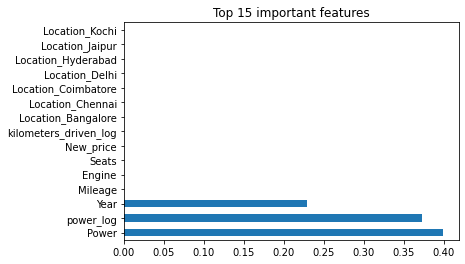

In [34]:
# Print important features similar to decision trees
from matplotlib import pyplot as plt

feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

**Observations and insights: **

- Engine Power has more importance in the cost of the vehicle
- Year also plays a significant role

### **Hyperparameter Tuning: Decision Tree**

In [35]:
from sklearn.model_selection import GridSearchCV

# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100]}

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned,param_grid=parameters,scoring='roc_auc',cv=3,verbose=3,  return_train_score=True)
grid_obj = grid_obj.fit(X_cleaned_train, y_train['price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_cleaned_train, y_train['price_log'])

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END max_depth=2, min_samples_leaf=5;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=2, min_samples_leaf=5;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=2, min_samples_leaf=5;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=2, min_samples_leaf=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=2, min_samples_leaf=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=2, min_samples_leaf=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=2, min_samples_leaf=20;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=2, min_samples_leaf=20;, score=(train=nan, test=nan) total time=   0.0s


C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
 

[CV 3/3] END max_depth=2, min_samples_leaf=20;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=2, min_samples_leaf=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=2, min_samples_leaf=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=2, min_samples_leaf=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=2, min_samples_leaf=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=2, min_samples_leaf=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=2, min_samples_leaf=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=3, min_samples_leaf=5;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=3, min_samples_leaf=5;, score=(train=nan, test=nan) total time=   0.0s


C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
 

[CV 3/3] END max_depth=3, min_samples_leaf=5;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=3, min_samples_leaf=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=3, min_samples_leaf=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=3, min_samples_leaf=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=3, min_samples_leaf=20;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=3, min_samples_leaf=20;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=3, min_samples_leaf=20;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=3, min_samples_leaf=50;, score=(train=nan, test=nan) total time=   0.0s


C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
 

[CV 2/3] END max_depth=3, min_samples_leaf=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=3, min_samples_leaf=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=3, min_samples_leaf=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=3, min_samples_leaf=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=3, min_samples_leaf=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=5, min_samples_leaf=5;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_leaf=5;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_leaf=5;, score=(train=nan, test=nan) total time=   0.0s


C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
 

[CV 1/3] END max_depth=5, min_samples_leaf=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_leaf=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_leaf=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=5, min_samples_leaf=20;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_leaf=20;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_leaf=20;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=5, min_samples_leaf=50;, score=(train=nan, test=nan) total time=   0.0s


C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
 

[CV 2/3] END max_depth=5, min_samples_leaf=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_leaf=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=5, min_samples_leaf=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_leaf=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_leaf=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=10, min_samples_leaf=5;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=10, min_samples_leaf=5;, score=(train=nan, test=nan) total time=   0.0s


C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
 

C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
 

[CV 3/3] END max_depth=10, min_samples_leaf=5;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=10, min_samples_leaf=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=10, min_samples_leaf=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=10, min_samples_leaf=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=10, min_samples_leaf=20;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=10, min_samples_leaf=20;, score=(train=nan, test=nan) total time=   0.0s


C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
 

[CV 3/3] END max_depth=10, min_samples_leaf=20;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=10, min_samples_leaf=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=10, min_samples_leaf=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=10, min_samples_leaf=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=10, min_samples_leaf=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=10, min_samples_leaf=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=10, min_samples_leaf=100;, score=(train=nan, test=nan) total time=   0.0s


C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
 

[CV 1/3] END max_depth=20, min_samples_leaf=5;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=20, min_samples_leaf=5;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=20, min_samples_leaf=5;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=20, min_samples_leaf=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=20, min_samples_leaf=10;, score=(train=nan, test=nan) total time=   0.0s


C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
 

[CV 3/3] END max_depth=20, min_samples_leaf=10;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=20, min_samples_leaf=20;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=20, min_samples_leaf=20;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=20, min_samples_leaf=20;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=20, min_samples_leaf=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=20, min_samples_leaf=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=20, min_samples_leaf=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=20, min_samples_leaf=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=20, min_samples_leaf=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=20, min_samples_leaf=100;, score=(train=nan, test=nan) total time=   0.0s


C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\rajac\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\rajac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
 

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=1)

In [36]:
# Get score of the dtree_tuned

Dtree_model = get_model_score(dtree_tuned)

R-sqaure on training set :  0.36808277404981204
R-square on test set :  0.3796163512778944
RMSE on training set :  8.552623259021248
RMSE on test set :  8.51724977553283


**Feature Importance**

In [37]:
# Print important features of tuned decision tree similar to decision trees

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                   Imp
power_log      0.74836
Year           0.25164
Model_New      0.00000
Model_Optra    0.00000
Model_One      0.00000
...                ...
Model_Captur   0.00000
Model_Cayenne  0.00000
Model_Cayman   0.00000
Model_Cedia    0.00000
Model_redi-GO  0.00000

[276 rows x 1 columns]


**Observations and insights:**

- Engine Power has more importance in the cost of the vehicle
- Year also plays a role but not that significant

### **Hyperparameter Tuning: Random Forest**

In [38]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

regr_tuned = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = regr_tuned,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(X_cleaned_train, y_train['price_log'])

regr_tuned.fit(X_cleaned_train, y_train['price_log'])

#print ('Random grid: ', random_grid, '\n')

# print the best parameters
#print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestRegressor()

In [39]:
# Get score of the model

**Feature Importance**

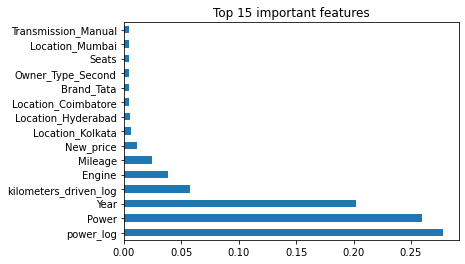

In [40]:
# Print important features of tuned decision tree similar to decision trees
feat_importances = pd.Series(regr_tuned.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

In [41]:
# Defining list of models you have trained
models = [lr, dtree, clf, regr]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [42]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree', "Ridge Regression", "Random Forest Regressor"], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.704073,0.657405,5.852769,6.329361
1,Decision Tree,0.368083,0.379616,8.552623,8.517250
2,Ridge Regression,0.695206,0.671818,5.939807,6.194791
3,Random Forest Regressor,0.406375,0.411432,8.289439,8.295979


**Observations:**

- Linear Regression and Ridge Regressor have the better performance metrics for R sqaure and RMSE values. So these models can be best fit. But feature importances are not identified by this model and another problem is Test RMSE value is higher than Train, so the model can be slightly overfitting.

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

### **Insights**

**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?